# Modelling nanomaterial properties using Machine Learning

This Jupyter Notebook implements the code to generate a ML model to predict antimicrobial activity of ZnO doped with Cerium.
The approach taken is to model using a supervised ML regression. 

Nanobiotech group, 
Tecnologico de Monterrey, Campus Guadalajara, Mexico
September 2023

### Import Libraries

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import the file to a pandas dataframe

In [2]:
# This dataset contains information to compute % survival, as a 
# function of several parameters

# 432 rows, 29 columns
# File Cerio02 includes all the 28 independent variables prior to normalization
df = pd.read_excel('./Dataset_ZnO+Ce.xlsx')

print(df.shape)

(432, 29)


Split target and variables

In this case, the target is the column named "survival". The rest of the columns will be the independent variables in the model.
survival = f(x1, x2, ... , x28)

In [3]:
# drop all columns but target (survival)
X = df.drop(labels={'survival'}, axis = 1) 

# get the target (survival)
y = df['survival']  # Target

### Normalize the data

A scaling on the data is performed by means of a Normalization.  

Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm)


[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.125 0.    ... 0.    0.    0.   ]
 [0.    0.25  0.    ... 0.    0.    0.   ]
 ...
 [1.    0.75  1.    ... 0.9   1.    1.   ]
 [1.    0.875 1.    ... 0.9   1.    1.   ]
 [1.    1.    1.    ... 0.9   1.    1.   ]]


### Split the data into train and test. 
Now using 70/30 % for train and test, respectively

In [5]:
# Splitting the data into train and test split (70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(302, 28)
(130, 28)
(302,)
(130,)


Import some sample regression metrics

In [6]:
from sklearn.metrics import explained_variance_score,mean_squared_error, mean_absolute_error,r2_score

Importing multiple regression models,

In [7]:
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

We have import multiple regression models here which are available to us in SciKit Learn api. We are just selecting some of them for this post.

Now create a list of these models

In [8]:
regressors = [
    MLPRegressor(max_iter=1000),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR()
]

The code to run all the models defined above and compute the error metrics (MAE)

In [9]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_test_p = model.predict(X_test)
    predict_time = time()-start

    print("%0.3f \t %0.3f \t %0.3f \t %0.3f \t %0.3f" % (train_time, predict_time, 
          explained_variance_score(y_test, y_test_p), mean_absolute_error(y_test, y_test_p),
          r2_score(y_test, y_test_p)))

    #print(model)
    #print("\tTraining time: %0.3fs" % train_time)
    #print("\tPrediction time: %0.3fs" % predict_time)
    #print("\tExplained variance:", explained_variance_score(y_test, y_test_p))
    #print("\tMean absolute error:", mean_absolute_error(y_test, y_test_p))
    #print("\tR2 score:", r2_score(y_test, y_test_p))
    #print()    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


1.539 	 0.001 	 0.777 	 9.098 	 0.770
0.001 	 0.041 	 0.670 	 9.281 	 0.668
0.037 	 0.000 	 0.985 	 2.272 	 0.985
0.129 	 0.005 	 0.985 	 1.871 	 0.985
0.108 	 0.003 	 0.985 	 2.080 	 0.985
0.001 	 0.000 	 0.980 	 2.116 	 0.980
0.001 	 0.000 	 0.688 	 10.829 	 0.680
0.000 	 0.000 	 0.637 	 10.848 	 0.634
0.000 	 0.000 	 0.684 	 10.756 	 0.677
0.002 	 0.002 	 0.259 	 14.533 	 0.222


In [10]:
# y_test is a dataframe, while y_test_p is an array, so they need to be converted to a common data structure.
# in this case, we are passing y_test to an array     
t_test_array = y_test.to_numpy(copy=True)

This piece of code will compute the predictions of both train and test datasets 
to generate the pairing plots of error. 

In [13]:
# We will only generate here the prediction files for the best and the worst models

# Best is Extremely Random Trees
model1 = ExtraTreesRegressor()
model1.fit(X_train, y_train)
y_test_p1 = model1.predict(X_test)
y_train_p1 = model1.predict(X_train)
# y_test is a dataframe, while y_test_p is an array, so they need to be converted to a common data structure.
# in this case, we are passing y_test to an array     
y_test_array = y_test.to_numpy(copy=True)
# Then, both arrays are put together to form a 2D matrix
y_matrix = np.vstack((y_test_array, y_test_p1)).T
# And the result is sent to a file 
pd.DataFrame(y_matrix).to_csv('./test_error_ETR.csv', index = False)

# y_train is a dataframe, while y_train_p is an array, so they need to be converted to a common data structure.
# in this case, we are passing y_test to an array     
y_train_array = y_train.to_numpy(copy=True)
# Then, both arrays are put together to form a 2D matrix
y_matrix = np.vstack((y_train_array, y_train_p1)).T
# And the result is sent to a file 
pd.DataFrame(y_matrix).to_csv('./train_error_ETR.csv', index = False)
r_squared2_p1 = r2_score(y_test, y_test_p1)

# Worst is SVR 
model2 = SVR()
model2.fit(X_train, y_train)
y_test_p2 = model2.predict(X_test)
y_train_p2 = model2.predict(X_train)
# y_test is a dataframe, while y_test_p is an array, so they need to be converted to a common data structure.
# in this case, we are passing y_test to an array     
y_test_array = y_test.to_numpy(copy=True)
# Then, both arrays are put together to form a 2D matrix
y_matrix = np.vstack((y_test_array, y_test_p2)).T
# And the result is sent to a file 
pd.DataFrame(y_matrix).to_csv('./test_error_SVR.csv', index = False)

# y_train is a dataframe, while y_train_p is an array, so they need to be converted to a common data structure.
# in this case, we are passing y_test to an array     
y_train_array = y_train.to_numpy(copy=True)
# Then, both arrays are put together to form a 2D matrix
y_matrix = np.vstack((y_train_array, y_train_p2)).T
# And the result is sent to a file 
pd.DataFrame(y_matrix).to_csv('./train_error_SVR.csv', index = False)

r_squared2_p2 = r2_score(y_test, y_test_p2)

### Error plots

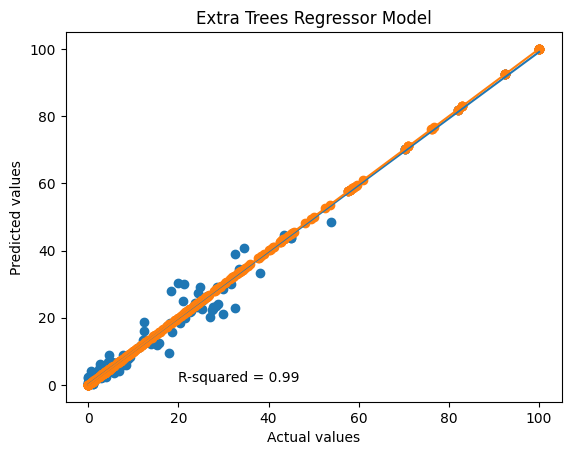

In [14]:
plt.title('Extra Trees Regressor Model')
plt.scatter(y_test_array,y_test_p1)
plt.scatter(y_train_array,y_train_p1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test_array), np.poly1d(np.polyfit(y_test_array, y_test_p1, 1))(np.unique(y_test_array)))
plt.plot(np.unique(y_train_array), np.poly1d(np.polyfit(y_train_array, y_train_p1, 1))(np.unique(y_train_array)))

plt.text(20, 0.9, 'R-squared = %0.2f' % r_squared2_p1)
plt.show()

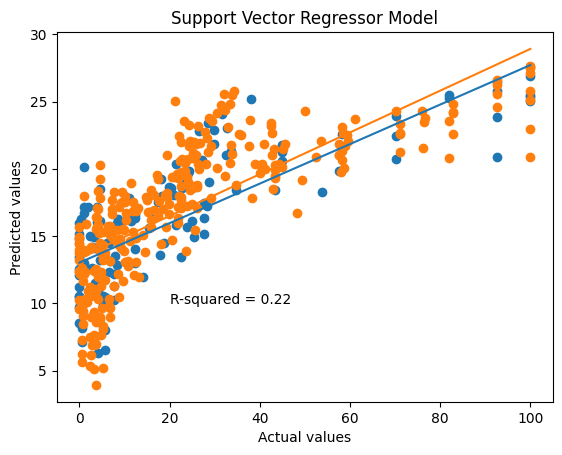

In [15]:
plt.title('Support Vector Regressor Model')
plt.scatter(y_test_array,y_test_p2)
plt.scatter(y_train_array,y_train_p2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test_array), np.poly1d(np.polyfit(y_test_array, y_test_p2, 1))(np.unique(y_test_array)))
plt.plot(np.unique(y_train_array), np.poly1d(np.polyfit(y_train_array, y_train_p2, 1))(np.unique(y_train_array)))

plt.text(20, 10, 'R-squared = %0.2f' % r_squared2_p2)
plt.show()

# Optimization step

Select the best models and optimize the hyper-parameters of them, run them again with the best parameters and compare the results

In [ ]:
# Import scikit-learn
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.metrics import mean_absolute_error # for calculating the cost function

## Optimize MPL Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import time

# get the start time
st = time.time()

param_list = {"hidden_layer_sizes": [(10,), (50,),(100,)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.00005,0.0005]}
CV_mlpr = GridSearchCV(estimator=MLPRegressor(), param_grid=param_list)
CV_mlpr.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds, or ', elapsed_time/60, ' minutes')

# print best parameter after tuning 
print(CV_mlpr.best_params_)

# Prediction
Y_prediction = CV_mlpr.predict(X_test)
test_mse = mean_squared_error(y_test, Y_prediction)
test_mae = mean_absolute_error(y_test, Y_prediction)

print("MAE for best model: ", test_mse)
print("MSE for best model: ", test_mae)

## Optimize Extra Trees Regressor


In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import time

# Define Grid 
# Consider the hyperparameters you want to test and the values for each in the grid

grid_etr = {
    #'n_estimators':[int(x) for x in np.arange(start = 100, stop = 2100, step = 100)],
    'n_estimators':[100, 200, 300, 400, 500],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [2,8,16,32,50],
    #'min_samples_split': [2,4,6],
    #'min_samples_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': [1.0,'sqrt','log2'],    
    #'bootstrap': [True, False],
    #'warm_start': [True, False],
}

# get the start time
st = time.time()

## Grid Search function
CV_etr = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid= grid_etr)
CV_etr.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds, or ', elapsed_time/60, ' minutes')

# print best parameter after tuning 
print(CV_etr.best_params_)

In [ ]:
# Prediction
Y_prediction = CV_etr.predict(X_test)
test_mse = mean_squared_error(y_test, Y_prediction)
test_mae = mean_absolute_error(y_test, Y_prediction)

print("MAE for best model: ", test_mse)
print("MSE for best model: ", test_mae)

## Optimize Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import time

# Define Grid 
# Consider the hyperparameters you want to test and the values for each in the grid
grid = { 
    'n_estimators': [100, 200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

# get the start time
st = time.time()

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds, or ', elapsed_time/60, ' minutes')

# print best parameter after tuning 
print(CV_rfr.best_params_)

# Prediction
Y_prediction = CV_rfr.predict(X_test)
test_mse = mean_squared_error(y_test, Y_prediction)
test_mae = mean_absolute_error(y_test, Y_prediction)

print("MAE for best model: ", test_mse)
print("MSE for best model: ", test_mae)

Run it with the best parameters

In [ ]:
# Create and train model with best parameters
rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)

# Predict on test data
prediction = rf.predict(X_test)

# Compute errors
best_mae = mean_absolute_error(y_test, prediction)
best_mse = mean_squared_error(y_test, prediction)
best_rmse= best_mse**0.5

# Print results

print("MAE for best model: ", best_mse)
print("MSE for best model: ", best_rmse)


# Optimize Decision Tree Regressor

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from datetime import datetime
import time


std_slc = StandardScaler()
pca = decomposition.PCA()
dtreeReg = tree.DecisionTreeRegressor()


pipe = Pipeline(steps=[("std_slc", std_slc),("pca", pca),("dtreeReg", dtreeReg)])

n_components = list(range(1,X.shape[1]+1,1))
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]
parameters = dict(pca__n_components=n_components,
                      dtreeReg__criterion=criterion,
                      dtreeReg__max_depth=max_depth)

clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)


print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])
CV_Result = cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


In [ ]:
# Define Grid 
# Consider the hyperparameters you want to test and the values for each in the grid
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }



#grid = { 
#    'n_estimators': [100, 200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [18]
#}

# get the start time
st = time.time()

## Grid Search function
CV_dtr = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, cv= 5)
CV_dtr.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds, or ', elapsed_time/60, ' minutes')

# print best parameter after tuning 
print(CV_dtr.best_params_)

Y_prediction = CV_dtr.predict(X_test)
test_mse = mean_squared_error(y_test, Y_prediction)
test_mae = mean_absolute_error(y_test, Y_prediction)

print("MAE for best model: ", test_mse)
print("MSE for best model: ", test_mae)

Run it with best parameters

In [ ]:
# Create and train model with best parameters
rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)

# Predict on test data
prediction = rf.predict(X_test)

# Compute errors
best_mae = mean_absolute_error(y_test, prediction)
best_mse = mean_squared_error(y_test, prediction)
best_rmse= best_mse**0.5

# Print results

print("MAE for best model: ", best_mse)
print("MSE for best model: ", best_rmse)

In [ ]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,y)
#print(model.best_params_,'\n')
#print(model.best_estimator_,'\n')

In [ ]:
sns.set_theme()
sns.histplot(y_pred-y_test, kde=True, stat="density")
#sns.histplot(y_pred-y_test, kde=True, stat="density", kde_kws=dict(cut=3))

# Attribute selection by using an Extra Tree

In [ ]:

from sklearn.ensemble import ExtraTreesRegressor

# Building the model
ETR = ExtraTreesRegressor()

# Training the model
ETR.fit(X_train,y_train)

# Computing the importance of each feature
feature_importance = ETR.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([ETR.feature_importances_ for tree in
										ETR.estimators_],
										axis = 0)


In [ ]:
feature_importance_normalized


In [ ]:
feature_importance 


In [ ]:
feat_importances = pd.Series(RFR.feature_importances_, index=X.columns)
feat_importances

In [ ]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

### Determine the n best features using scikit learn feature selection functions

In [ ]:
#Import required modules

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top k best features
bestfeatures = SelectKBest(f_regression, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


In [ ]:
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(5)
# print(rf_model.feature_importances_)

# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)